# Scoping

## Project Objective

## Methodology

### Performance Measure

Confusion Matrix with minimizing false positives


# Project Set Up

## Import Python Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading the Data

In [2]:
df = pd.read_csv('profiles.csv', encoding = 'utf-8')
df.reset_index()
df = df.replace({None: np.nan})
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
essays = [f'essay{i}' for i in range(0, 10, 1)]
df.drop(essays, axis = 1, inplace = True)

# Exploratory Data Analysis

## Initial Analysis

Observations:

1. 3 (in actuality 2) numerical attributes, 18 categorical attributes.
2. `diet`, `drugs`, `offspring`, `pets`, `religion`, `sign` have non-null counts less than 5000 
3.  Income appears to actually be a categorical.
4. `diet`, `job`, `offspring`, `pets`, `religion`, `sign`, `income` all have value with the highest count is Null.
5. `last_online` is a date time attribute but not formated as one.
6. `education`, `ethnicity`, `speaks`, `pets`, `religion`, `sign`, `speaks`, `diet`, `offspring` all contain two or more pieces of infomation.
7. `offspring` and `sign` have corrupted strings.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

In [5]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [6]:
df.income.value_counts()

income
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: count, dtype: int64

In [7]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

rows = []

for col in cat_cols:
    vc = df[col].value_counts(dropna=False)

    top5 = [f"{idx} : {cnt}" for idx, cnt in vc.head(5).items()]
    bottom5 = [f"{idx} : {cnt}" for idx, cnt in vc.tail(5).items()]

    # pad lists to length 5 to avoid index errors
    top5 += [None] * (5 - len(top5))
    bottom5 += [None] * (5 - len(bottom5))

    row = (
        {"attribute": col}
        | {f"top_{i+1}": top5[i] for i in range(5)}
        | {f"bottom_{i+1}": bottom5[i] for i in range(5)}
    )

    rows.append(row)

value_counts_table = pd.DataFrame(rows)
value_counts_table

,attribute,top_1,top_2,top_3,top_4,top_5,bottom_1,bottom_2,bottom_3,bottom_4,bottom_5
0,body_type,average : 14652,fit : 12711,athletic : 11819,nan : 5296,thin : 4711,full figured : 1009,overweight : 444,jacked : 421,used up : 355,rather not say : 198
1,diet,nan : 24395,mostly anything : 16585,anything : 6183,strictly anything : 5113,mostly vegetarian : 3444,mostly halal : 48,strictly halal : 18,strictly kosher : 18,halal : 11,kosher : 11
2,drinks,socially : 41780,rarely : 5957,often : 5164,not at all : 3267,nan : 2985,often : 5164,not at all : 3267,nan : 2985,very often : 471,desperately : 322
3,drugs,never : 37724,nan : 14080,sometimes : 7732,often : 410,None,never : 37724,nan : 14080,sometimes : 7732,often : 410,None
4,education,graduated from college/university : 23959,graduated from masters program : 8961,nan : 6628,working on college/university : 5712,working on masters program : 1683,ph.d program : 26,law school : 19,dropped out of law school : 18,dropped out of med school : 12,med school : 11
5,ethnicity,white : 32831,asian : 6134,nan : 5680,hispanic / latin : 2823,black : 2008,"asian, black, pacific islander, hispanic / lat...","asian, native american, indian, pacific island...","asian, middle eastern, black, pacific islander...","asian, black, pacific islander, white, other : 1","asian, black, indian : 1"
6,job,nan : 8198,other : 7589,student : 4882,science / tech / engineering : 4848,computer / hardware / software : 4709,rather not say : 436,transportation : 366,unemployed : 273,retired : 250,military : 204
7,last_online,2012-06-29-22-56 : 24,2012-06-30-22-56 : 23,2012-06-30-21-51 : 23,2012-06-30-22-09 : 23,2012-06-30-23-27 : 23,2012-05-15-15-27 : 1,2012-05-30-10-59 : 1,2012-06-21-05-56 : 1,2012-06-02-10-49 : 1,2012-05-31-02-29 : 1
8,location,"san francisco, california : 31064","oakland, california : 7214","berkeley, california : 4212","san mateo, california : 1331","palo alto, california : 1064","denver, colorado : 1","seattle, washington : 1","cincinnati, ohio : 1","phoenix, arizona : 1","rochester, michigan : 1"
9,offspring,nan : 35561,doesn&rsquo;t have kids : 7560,"doesn&rsquo;t have kids, but might want them :...","doesn&rsquo;t have kids, but wants them : 3565",doesn&rsquo;t want kids : 2927,wants kids : 225,might want kids : 182,"has kids, and might want more : 115","has a kid, and wants more : 71","has kids, and wants more : 21"


## Implementing Conclusions of Initial Analysis

In [8]:
df.drop(columns = ["last_online", "location", "income", "ethnicity", "diet", "offspring", "pets", "religion", "sign"], inplace = True)

## Creating a Test Set

In [9]:
from reproducable_split2 import add_identifiers

df = add_identifiers(df)

In [10]:
def create_working(df):
    train_df = df[df["which_set"] == "train"]
    working = train_df.copy()
    return working

def create_holding(df):
    test_df = df[df["which_set"] == "test"]
    holding = test_df.copy()
    return holding

working = create_working(df)

## Continued Analysis

### Numerical Attributes

`age` (a person's age): right skew, single modality, no visible truncation, 2638 outliers

`height` (a person's height): no visible skew, single modality, no visible truncation, 285 outliers

In [11]:
working[["age", "height"]].describe()

,age,height
count,53951.000000,53949.000000
mean,32.334025,68.300209
std,9.445870,3.994036
min,18.000000,1.000000
25%,26.000000,66.000000
50%,30.000000,68.000000
75%,37.000000,71.000000
max,110.000000,95.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>]], dtype=object)

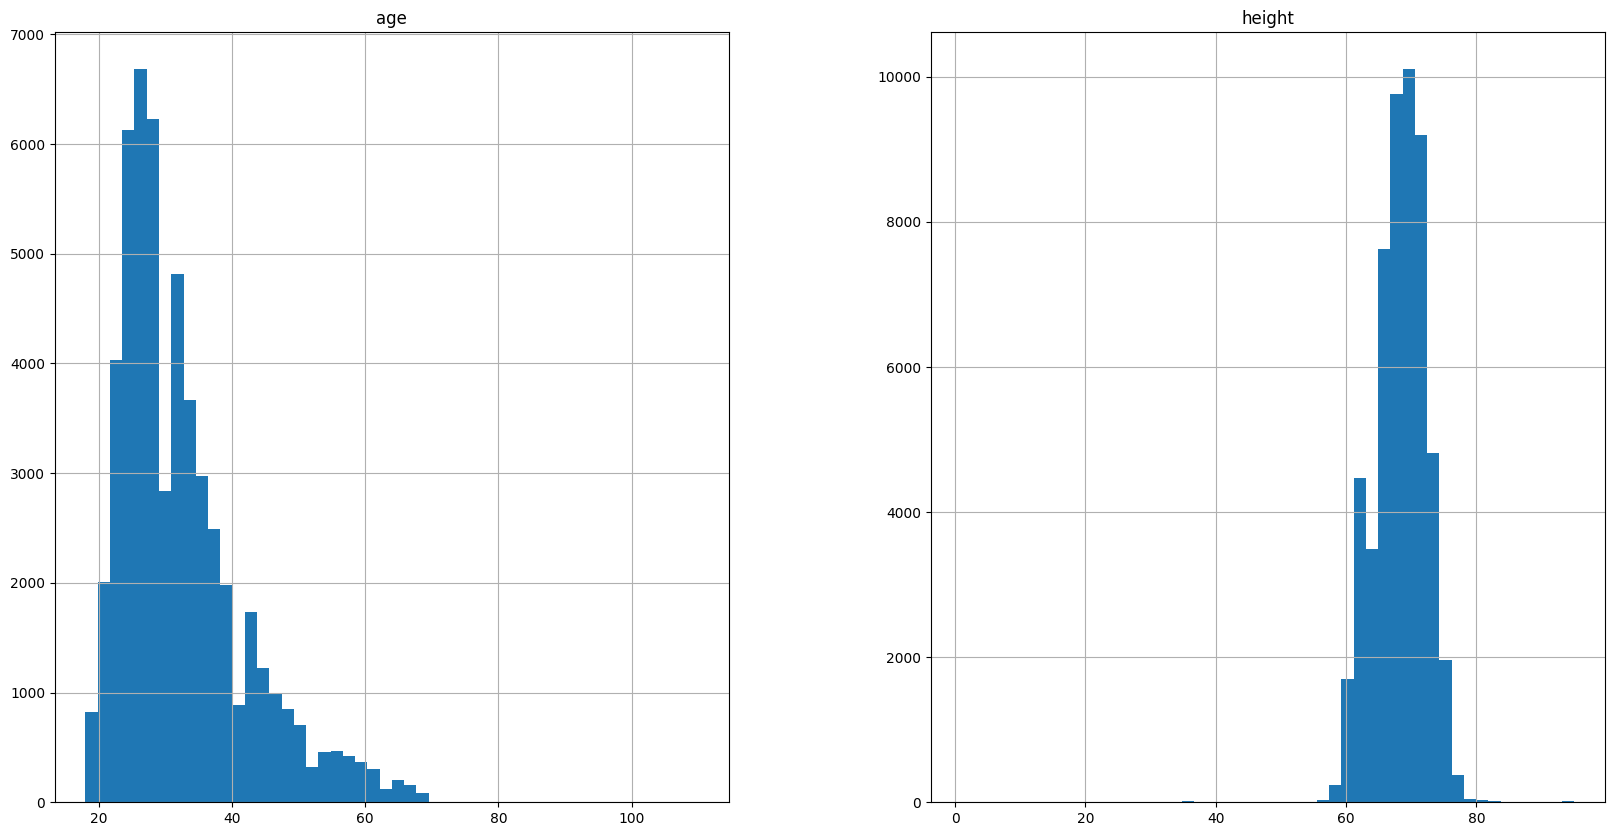

In [12]:
working.hist(bins = 50, figsize = (20,10))

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

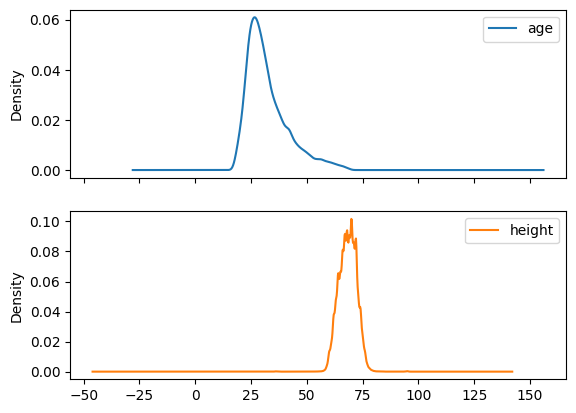

In [13]:
working[["age", "height"]].plot(kind = 'density', subplots = True)

In [14]:
from my_functions import find_outliers
outliers = find_outliers(working, columns = ["age", "height"])
outliers.sum()

age       2359
height     260
dtype: int64

### Categorical Attributes

`body_type` (An indication of a person's perception of their own body type): "average" has the highest count.

`drinks` (An indication of alchol habits): "socially" is the highest count.

`drugs` (an indication of drug use): "never" is the highest count.

`education` (an indication of educational attainment): "graduated from college/university" is the highest count.

`jobs` (an indication of a persons employment sector): "other" has the highest count.

`orientation`(an indication of sexuality): "straight" has the highest count.

`sex` (an indication of biologal sex): "M" has the highest count. "F" has the lowest count.

`smokes` (an indication of smoking habits): "no" has the highest count.

`speaks` (an indication of languages spoken): Has too many different values to be visualized in a useful way. "english" has the highest count.

`status` (an indication of relationship status); "single" has the highest count.



#### `body_type` Variation

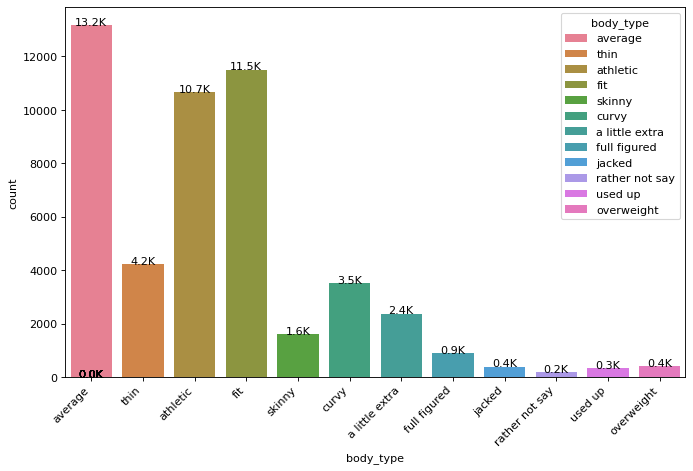

In [15]:
from my_functions import vc_bar

vc_bar(working, 'body_type')

#### `drinks` Variation

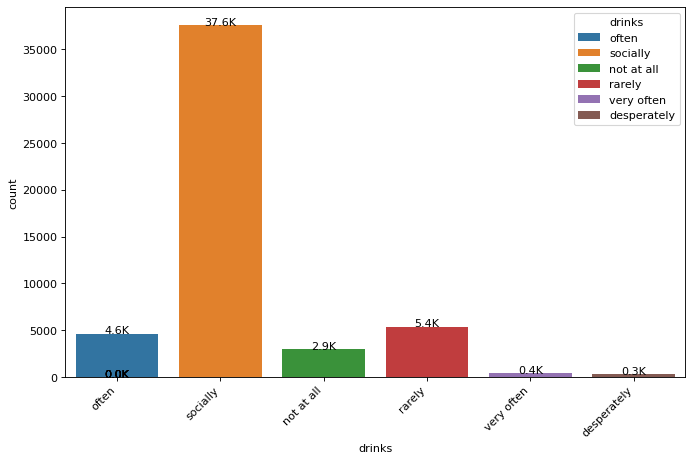

In [16]:
vc_bar(working, 'drinks')

#### `drugs` Variation

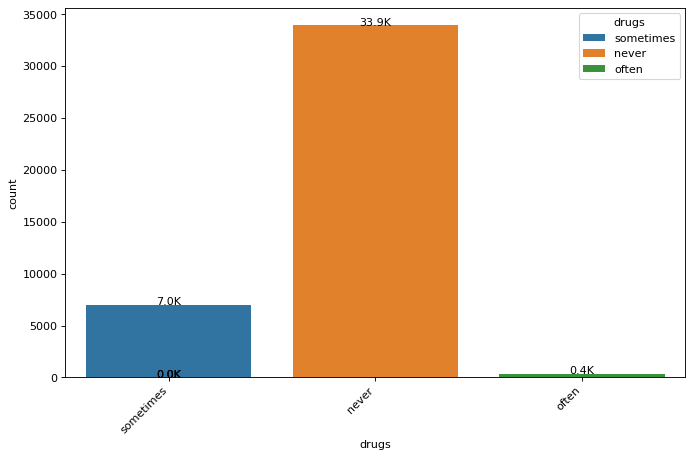

In [17]:
vc_bar(working, 'drugs')

#### `education` Variation

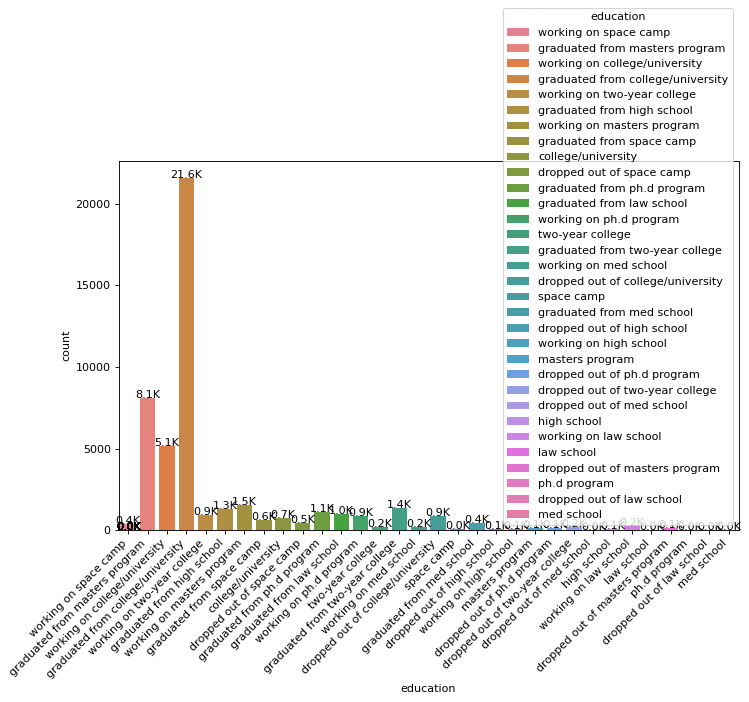

In [18]:
vc_bar(working, 'education')

#### `job` Variation

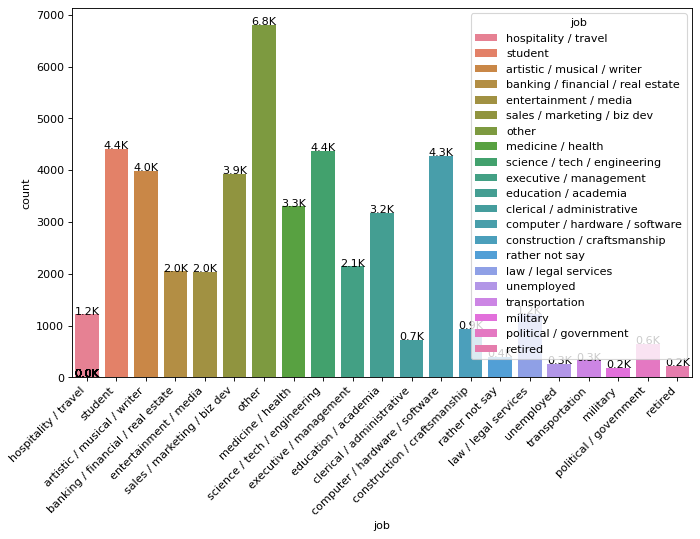

In [19]:
vc_bar(working, 'job')

#### `orientation` Variation

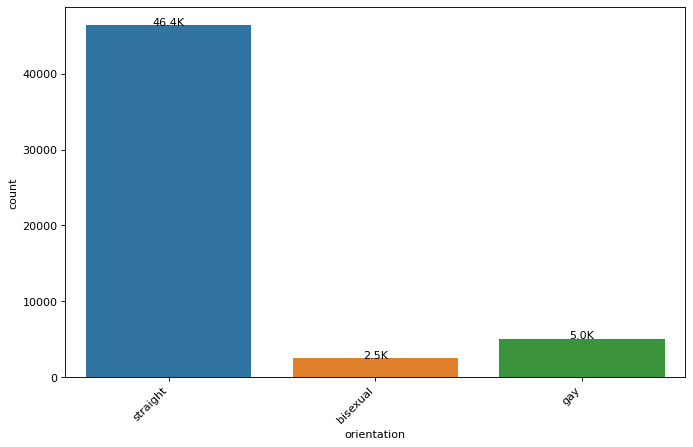

In [20]:
vc_bar(working, 'orientation')

#### `sex` Variation

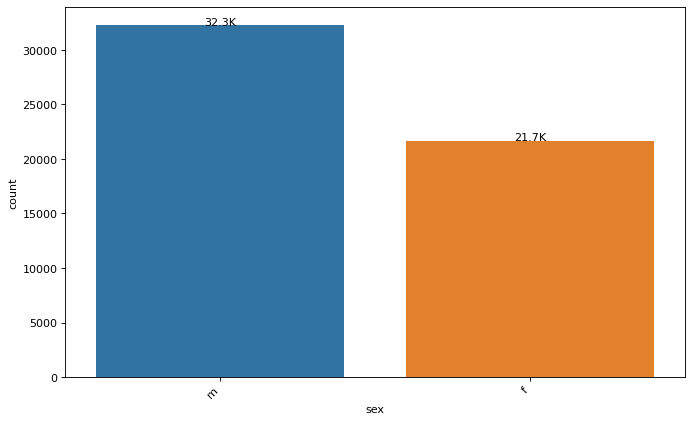

In [21]:
vc_bar(working, "sex")

#### `smokes` Variation

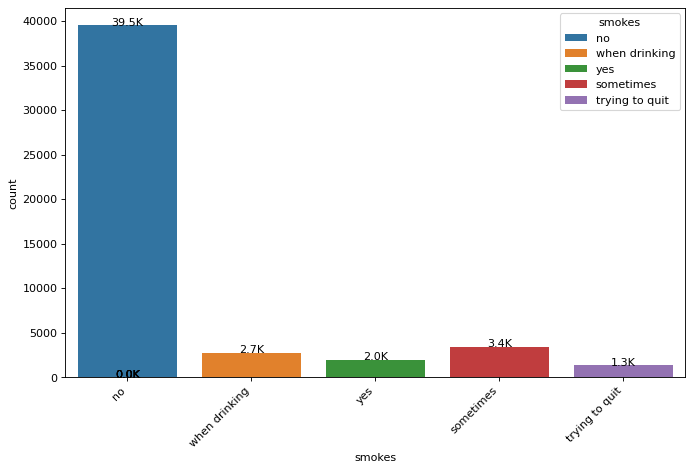

In [22]:
vc_bar(working, "smokes")

#### `speaks` Variation

Too many different values for a bar char.

In [23]:
working.speaks.value_counts(dropna = False)

speaks
english                                                                        19616
english (fluently)                                                              5967
english (fluently), spanish (poorly)                                            1838
english (fluently), spanish (okay)                                              1720
english (fluently), spanish (fluently)                                          1181
                                                                               ...  
english (fluently), portuguese (fluently), spanish (fluently), french              1
english (fluently), chinese (okay), dutch (poorly)                                 1
english (fluently), italian (fluently), spanish (poorly), romanian (poorly)        1
english (fluently), spanish (poorly), italian (poorly), khmer (poorly)             1
english (fluently), ukrainian (fluently), russian (fluently)                       1
Name: count, Length: 7078, dtype: int64

#### `status` Variation

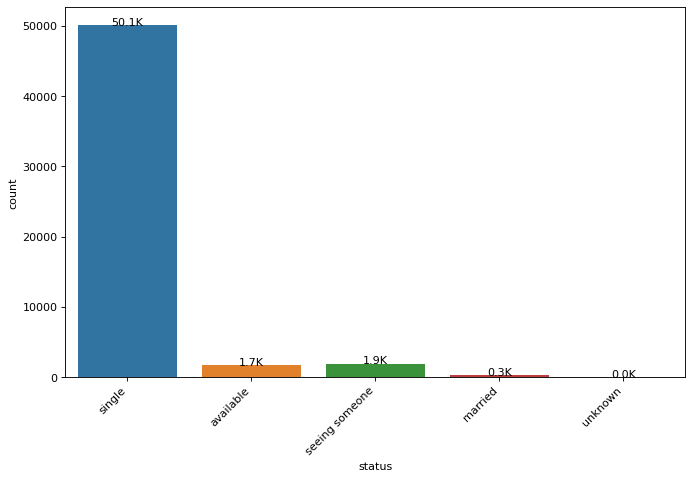

In [24]:
vc_bar(working, "status")

### Target Variable (`job`) Correlation

With `age`: Retired mean and median age is high and students low other values do not vary amongst themselves that much.

With `height`: construction, entertainment, military and science are on average the tallest.

With `body_type`: computer / hardware / software trend to be overweight, many students are skinny. artists are used up.

With `drinks`: students tend to not drink at all! Artists drink desperately.

With `drugs`: students tend take drugs often, artistists take drugs often

With `education`: law workers tend to be in or were in law school. Med workers tend to be in or were in med school. Students tend have the "working on {education_place}" status. **Education and Job relation is very tautological so opting to remove this as it will not be a very generalizable variable**

With `orientation`: students and artists tend to be bisexual.

With `sex`: education, medicine and student jobs are dominated by females. Science and compter jobs are dominated by men.

With `smokes`: artists and students tend to smokes

With `speaks`: way too high cardinality in speaks, heatmap indeciferable. **Requires cleaning**

With `status`: This variable is not very informative. Only shows that computer jobs tend to have 'unkown' status. **Opting to remove**

**Note: It was decided to remove rows with job = "other" as this value was overrepresented in the `job` attribute and not very informative, as it is essentially N/A.** 


#### `age`

In [25]:
working.groupby('job')['age'].agg(["median", "mean", pd.Series.mode])

,median,mean,mode
job,,,
artistic / musical / writer,31.0,33.502892,27
banking / financial / real estate,31.0,33.116870,27
clerical / administrative,30.0,32.981919,26
computer / hardware / software,31.0,32.653864,26
construction / craftsmanship,33.0,35.479277,"[27, 29]"
education / academia,32.0,34.530413,29
entertainment / media,30.0,32.175136,27
executive / management,35.0,36.937879,"[30, 32]"
hospitality / travel,29.0,30.913580,27


#### `height`

In [26]:
working.groupby('job')['height'].agg(["median", "mean", pd.Series.mode])

,median,mean,mode
job,,,
artistic / musical / writer,68.0,68.180035,70.0
banking / financial / real estate,69.0,68.528606,70.0
clerical / administrative,66.0,66.449235,67.0
computer / hardware / software,70.0,69.714052,70.0
construction / craftsmanship,70.0,70.198725,70.0
education / academia,67.0,67.346675,67.0
entertainment / media,69.0,69.029600,70.0
executive / management,69.0,68.908921,72.0
hospitality / travel,68.0,68.196708,70.0


#### `body_type`

In [27]:
working.drop(working[working.job == "other"].index, inplace = True)

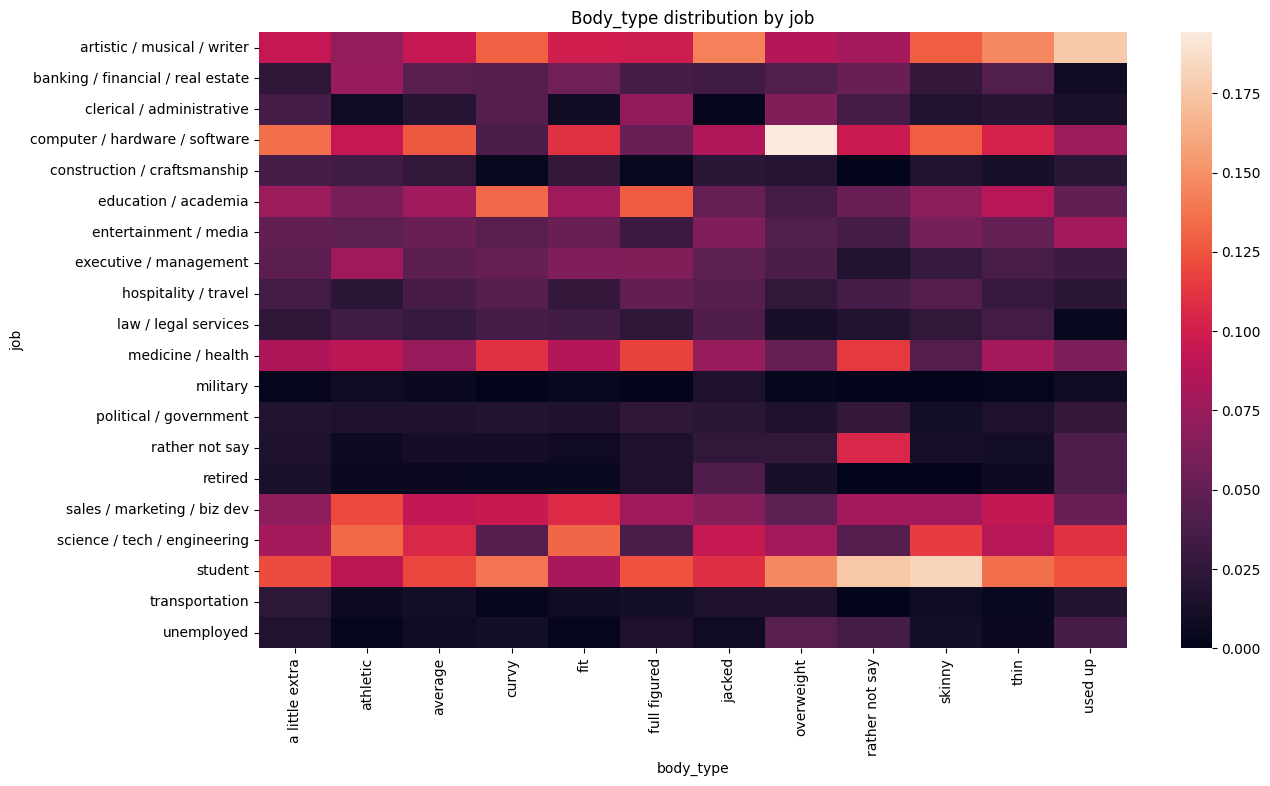

In [28]:
def create_ct(df, attrib_1, attrib_2, norm):
    plt.figure(figsize=(14,8))
    ct_norm = pd.crosstab(df[attrib_1], df[attrib_2], normalize = norm)
    sns.heatmap(ct_norm)
    plt.title(f'{attrib_2.capitalize()} distribution by {attrib_1}')

create_ct(working, 'job', 'body_type', 'columns')

#### `drinks`

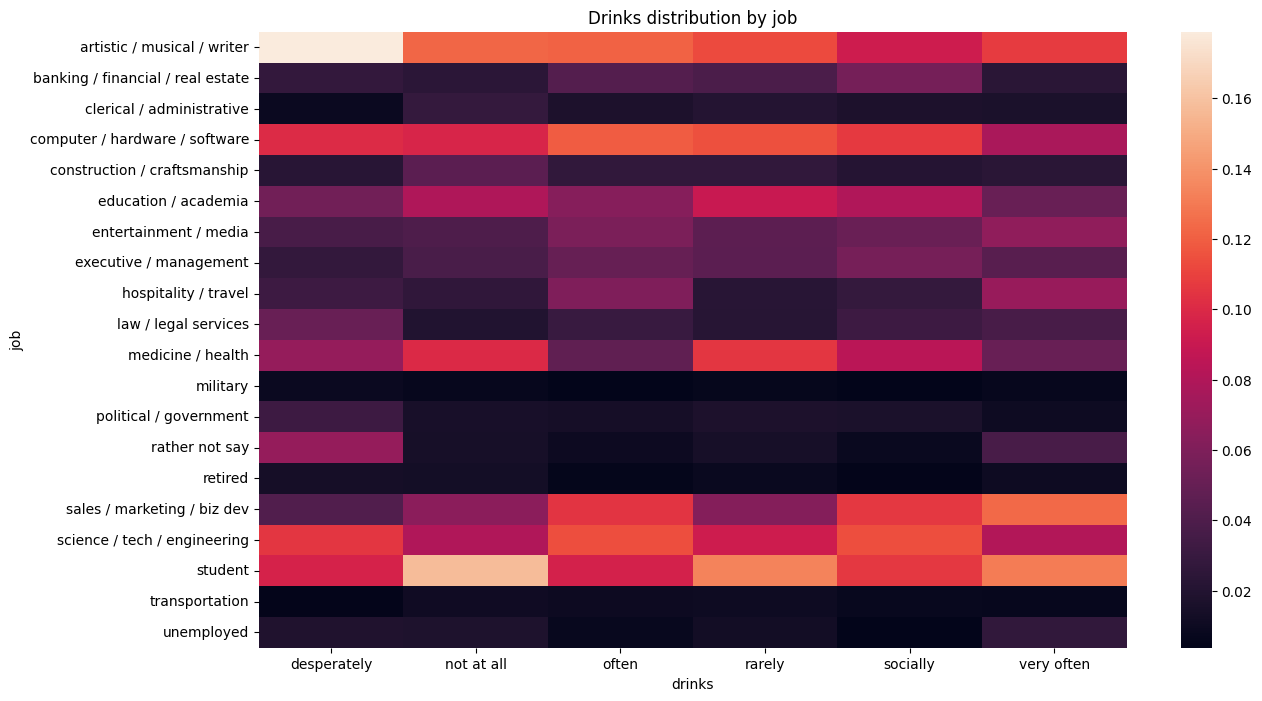

In [29]:
create_ct(working, 'job', 'drinks', 'columns')

#### `drugs`

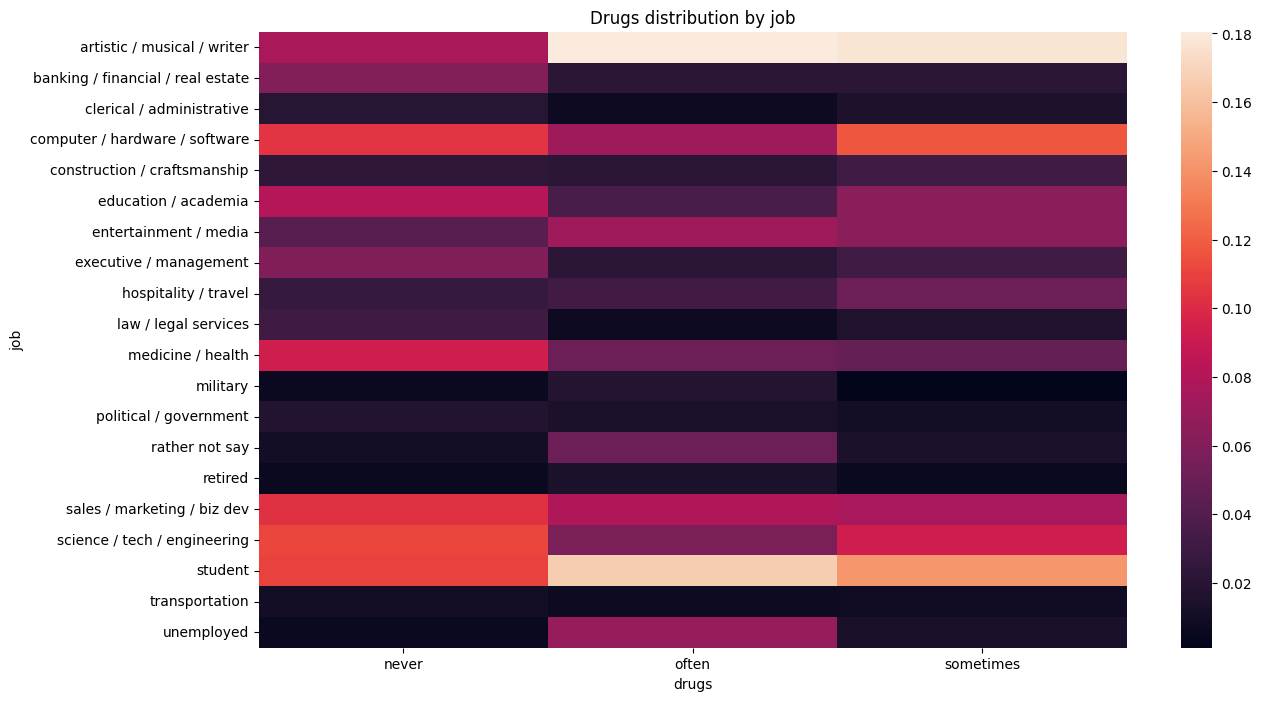

In [30]:
create_ct(working, 'job', 'drugs', 'columns')

#### `education`

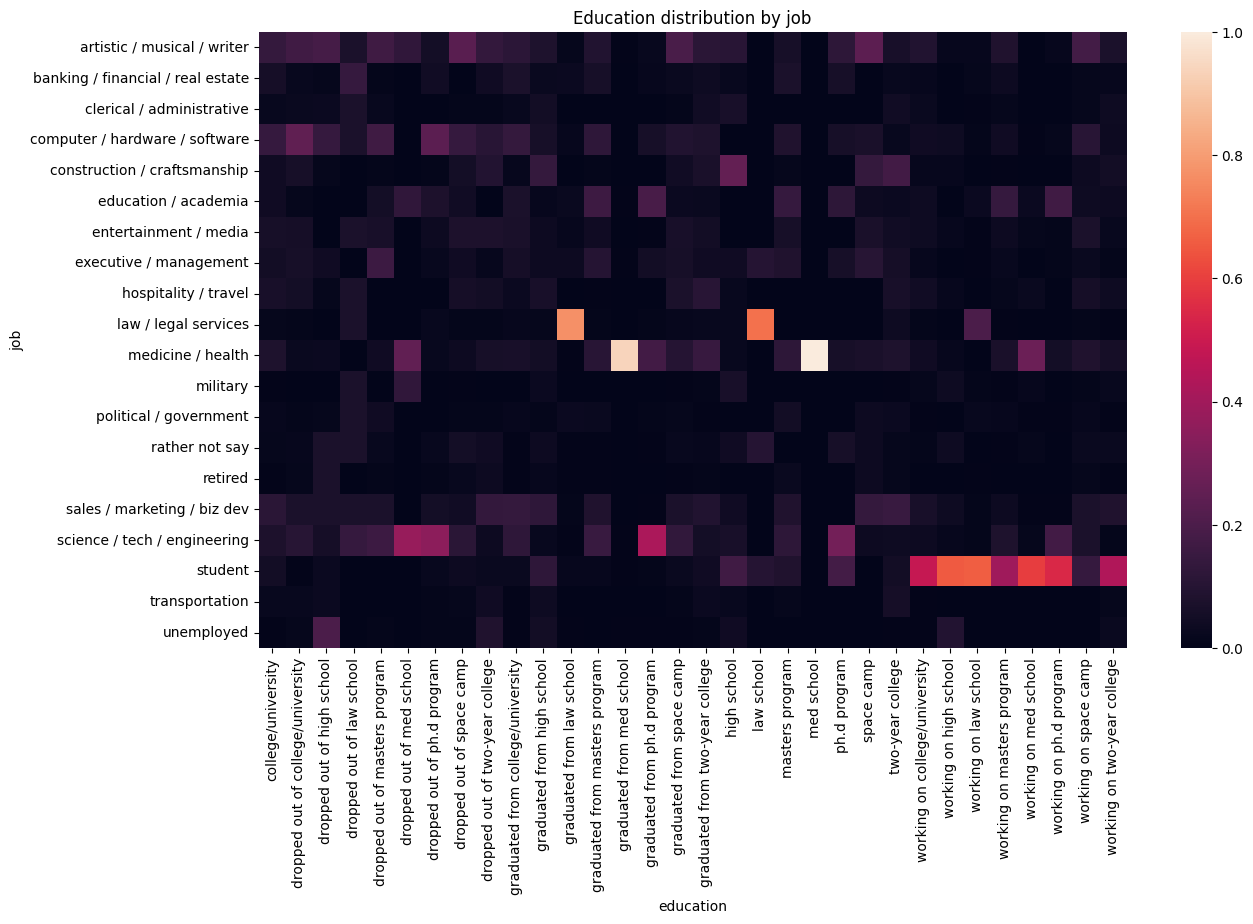

In [31]:
create_ct(working, 'job', 'education', 'columns')

#### `orientation`

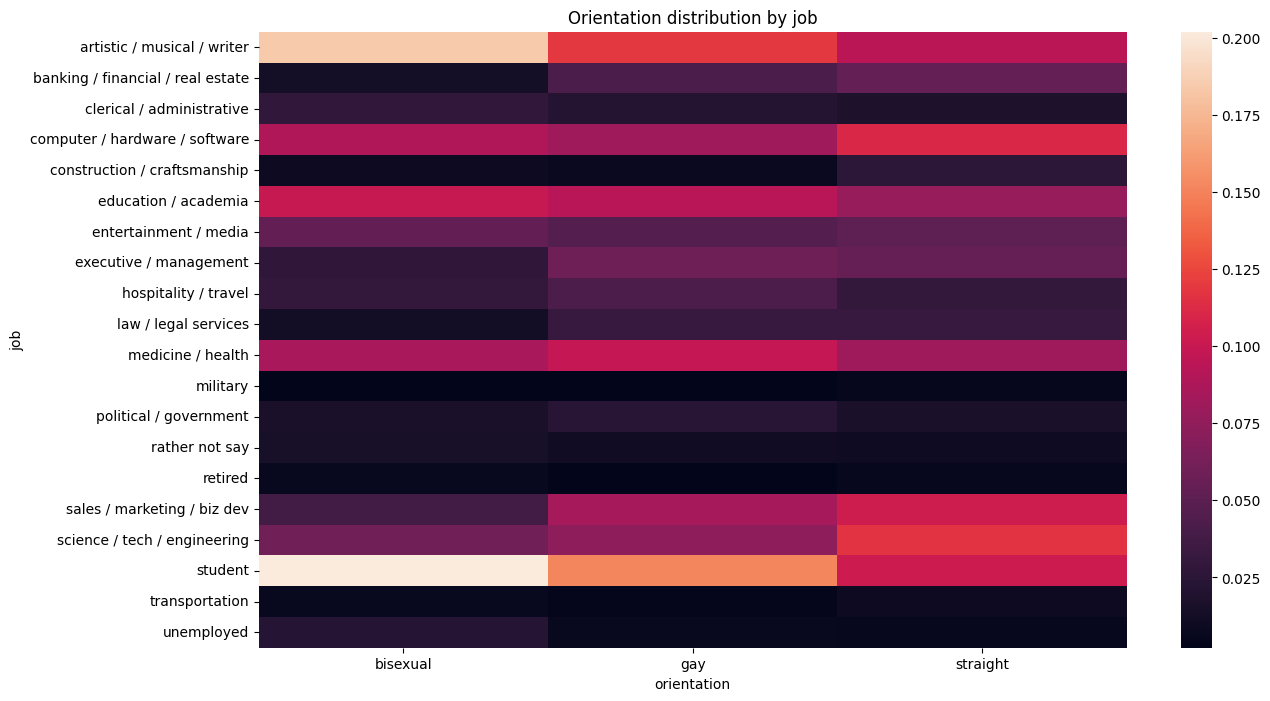

In [32]:
create_ct(working, 'job', 'orientation', 'columns')

#### `sex`

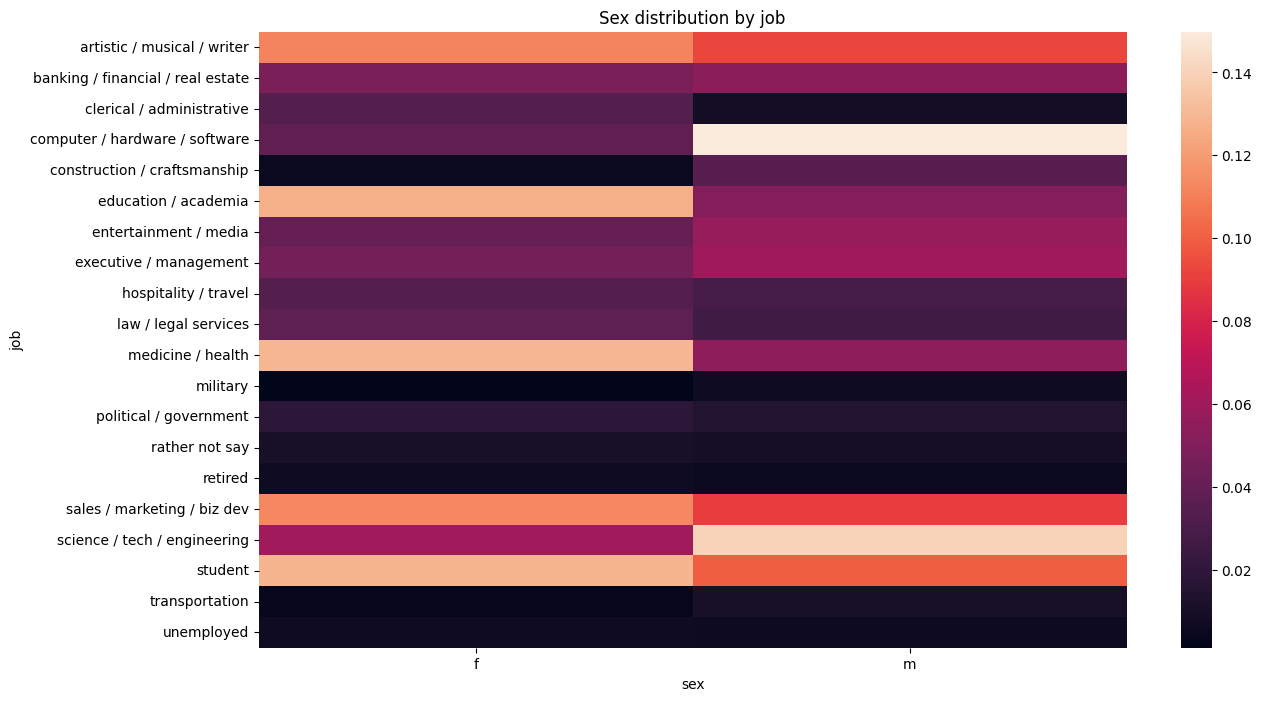

In [33]:
create_ct(working, 'job', 'sex', 'columns')

#### `smokes`

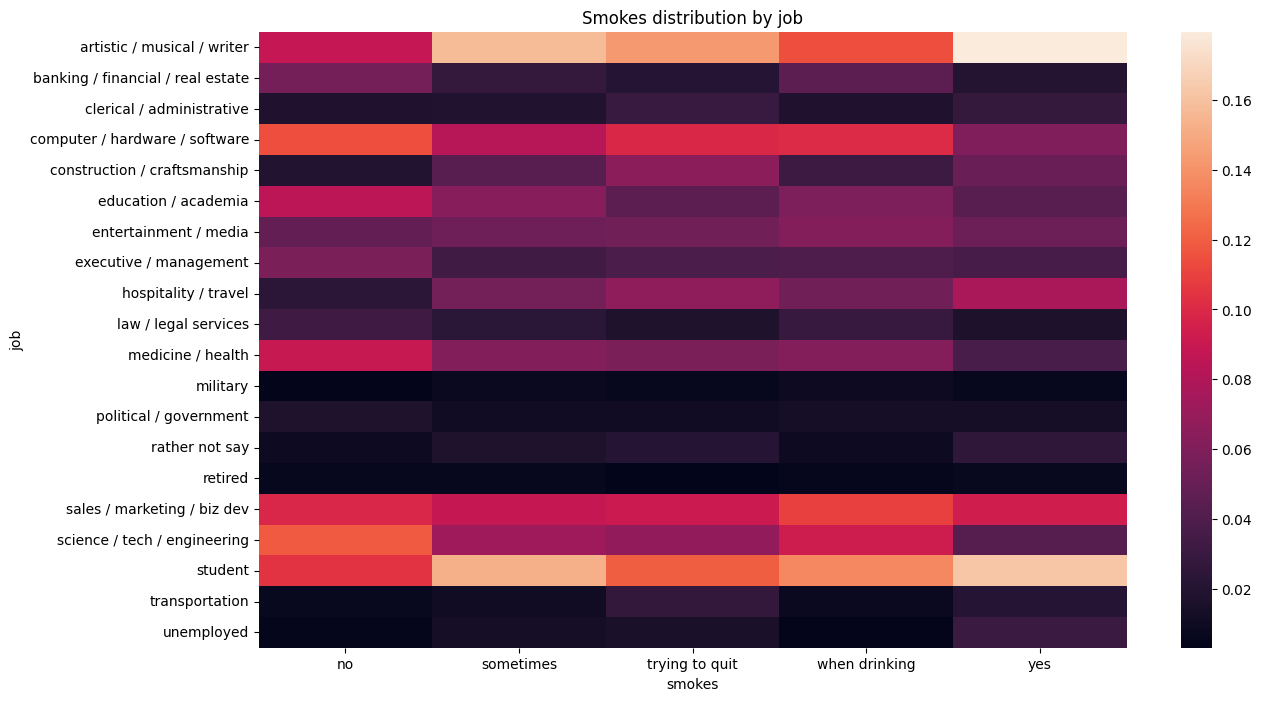

In [34]:
create_ct(working, 'job', 'smokes', 'columns')

#### `speaks`

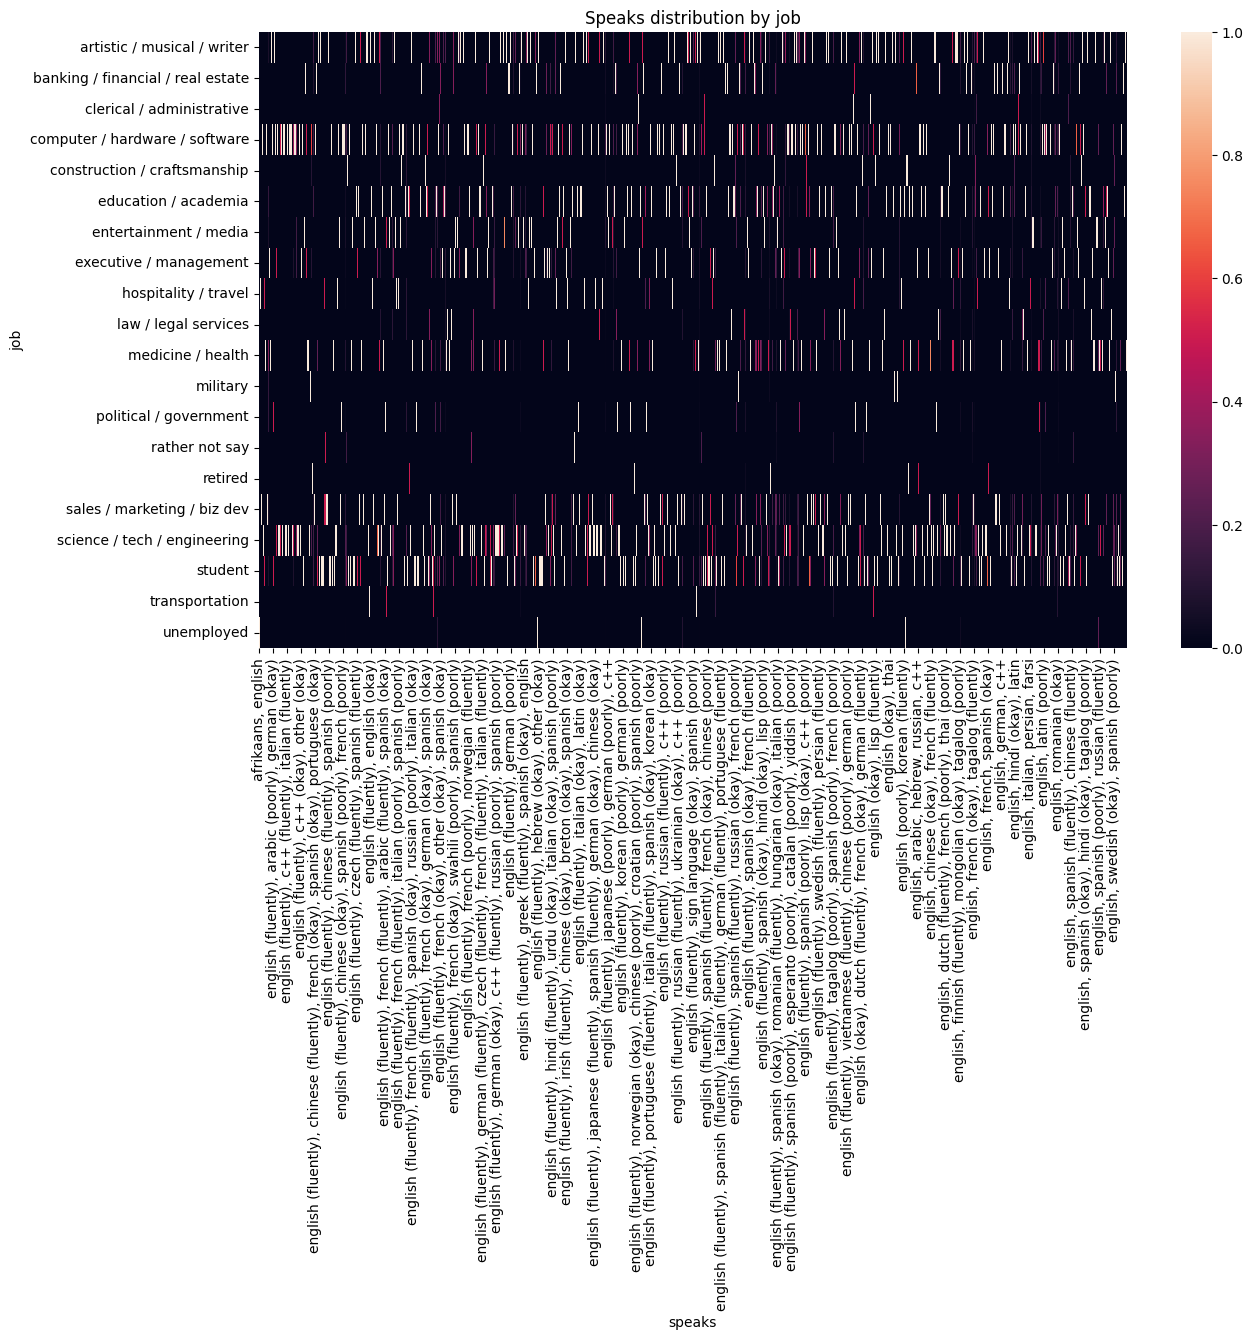

In [35]:
create_ct(working, 'job', 'speaks', 'columns')

#### `status`

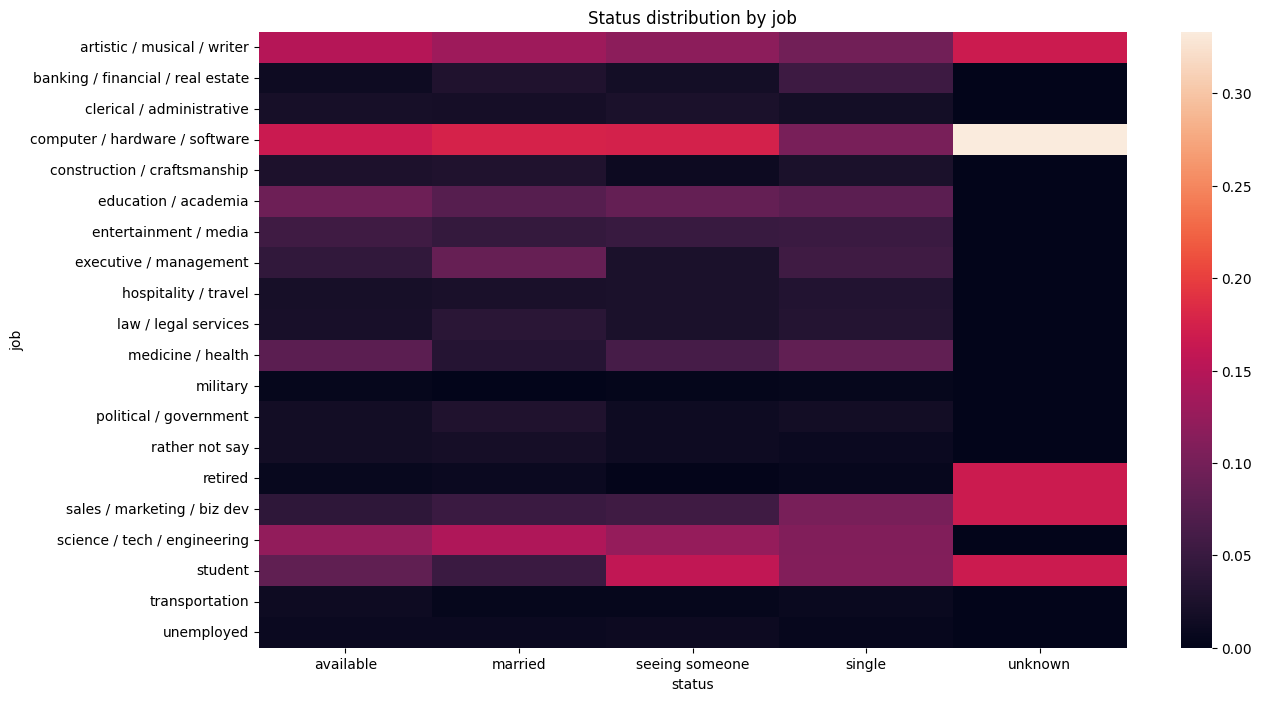

In [36]:
create_ct(working, 'job', 'status', 'columns')

## Implementing Descisions from Analysis of Target Variable Correlation

In [37]:
df.drop(columns = ["education", "status"], inplace = True)
df.drop(df[df['job'] == "other"].index, inplace = True)
working = create_working(df)

# Data Preparation

## Data Cleaning

First up is to clean the data and make sure it is suitable for use. My cleaning process for a single dataset consists of five steps:


1. Handling duplicate rows
2. Simplifying and standardizng attributes 
3. Handling missing values
4. Handling outliers + noise
5. Handling inconsitent attributes 

### Handling Duplicates

In [38]:
df.duplicated().sum()

np.int64(820)

### Simplification and Standardization of Attributes

Need to simplify the speaks model as it's high cardinality will be a terror for one hot encoding and result in a very ungeneralizable model if we use a decision tree or similar.

In [39]:
#Test for how many rows contain "english"
eng= df['speaks'].str.contains(r'\benglish\b', case = False, na = False).sum()

print(f"Number of subjects: {len(df['speaks'])}")
print(f"Number of subjects who speak english: {int(eng)}")
print(f"Number of subject who don't speak english: {len(df['speaks']) - int(eng)}")
print(f"Number of N/A in the speaks attribute: {df.speaks.isna().sum()}")

Number of subjects: 52357
Number of subjects who speak english: 52309
Number of subject who don't speak english: 48
Number of N/A in the speaks attribute: 48


In [40]:
df["english"] = df.speaks.apply(lambda x: x.lower().split(",") if isinstance(x, str) else x) #turn each string into a list (luckily our languages are already comma-seperated)
df['english'] = df.english.apply(lambda x: [entry.lstrip() for entry in x if 'english' in entry.lower()] if isinstance(x, list) else None)

working = create_working(df)
working['english'].value_counts(dropna = False)

english
[english]                                                                                               23540
[english (fluently)]                                                                                    22019
[english (okay)]                                                                                          802
[english (poorly)]                                                                                        459
[english, english (fluently)]                                                                              87
[english, english]                                                                                         82
None                                                                                                       45
[english (fluently), english (fluently)]                                                                   24
[english (fluently), english]                                                                              22
[e

In [41]:
english_scale = {'english(fluently)': 1, 'english': 2, 'english(okay)': 3, 'english(poorly)': 4}

def fix_english(english_list:list, english_scale:dict):

    current = english_list[0]
    if len(english_list) > 1:
        for i in range(1, len(english_list)):
            if english_scale[current] > english_scale[english_list[i]]:
                current = english_list[i]
        return current
    else:
        return current

df['english'] = df.english.apply(lambda x: [z.replace(" ", "") for z in x] if isinstance(x, list) else None)
df['english'] = df.english.apply(lambda x: fix_english(x, english_scale) if isinstance(x, list) else None)

working = create_working(df)
working['english'].value_counts(dropna = False)

english
english              23639
english(fluently)    22203
english(okay)          808
english(poorly)        460
None                    45
Name: count, dtype: int64

In [42]:
df.drop(columns = ['speaks'], inplace = True)
working = create_working(df)

### Handling Missing Values

Next up is check which values have nulls and then handling them if they do in a way that is essentially up to my own discretion, however I try to use multiple techniques to handle nulls. 

If we check our columns we can see that theres a few rows that are 100% good to go on that front but beyond this we have a select few rows mainly on extraneous personal data that our users probably didn't want to or coulnd't be bothered to fill in.

My Null Handling Methodology:

1. Find how many values are missing + what percentage of the attribute is missing
2. Try and find out why they might be missing (MCAR, MAR, MNAR)
3. Implement a solution to the nulls

In [43]:
def null_check(df):
    nulls = df.isna().sum().sort_values()
    print(nulls[nulls > 0])

null_check(working)

height           2
english         45
drinks        2489
body_type     4249
smokes        4515
job           7381
drugs        11151
dtype: int64


<Axes: >

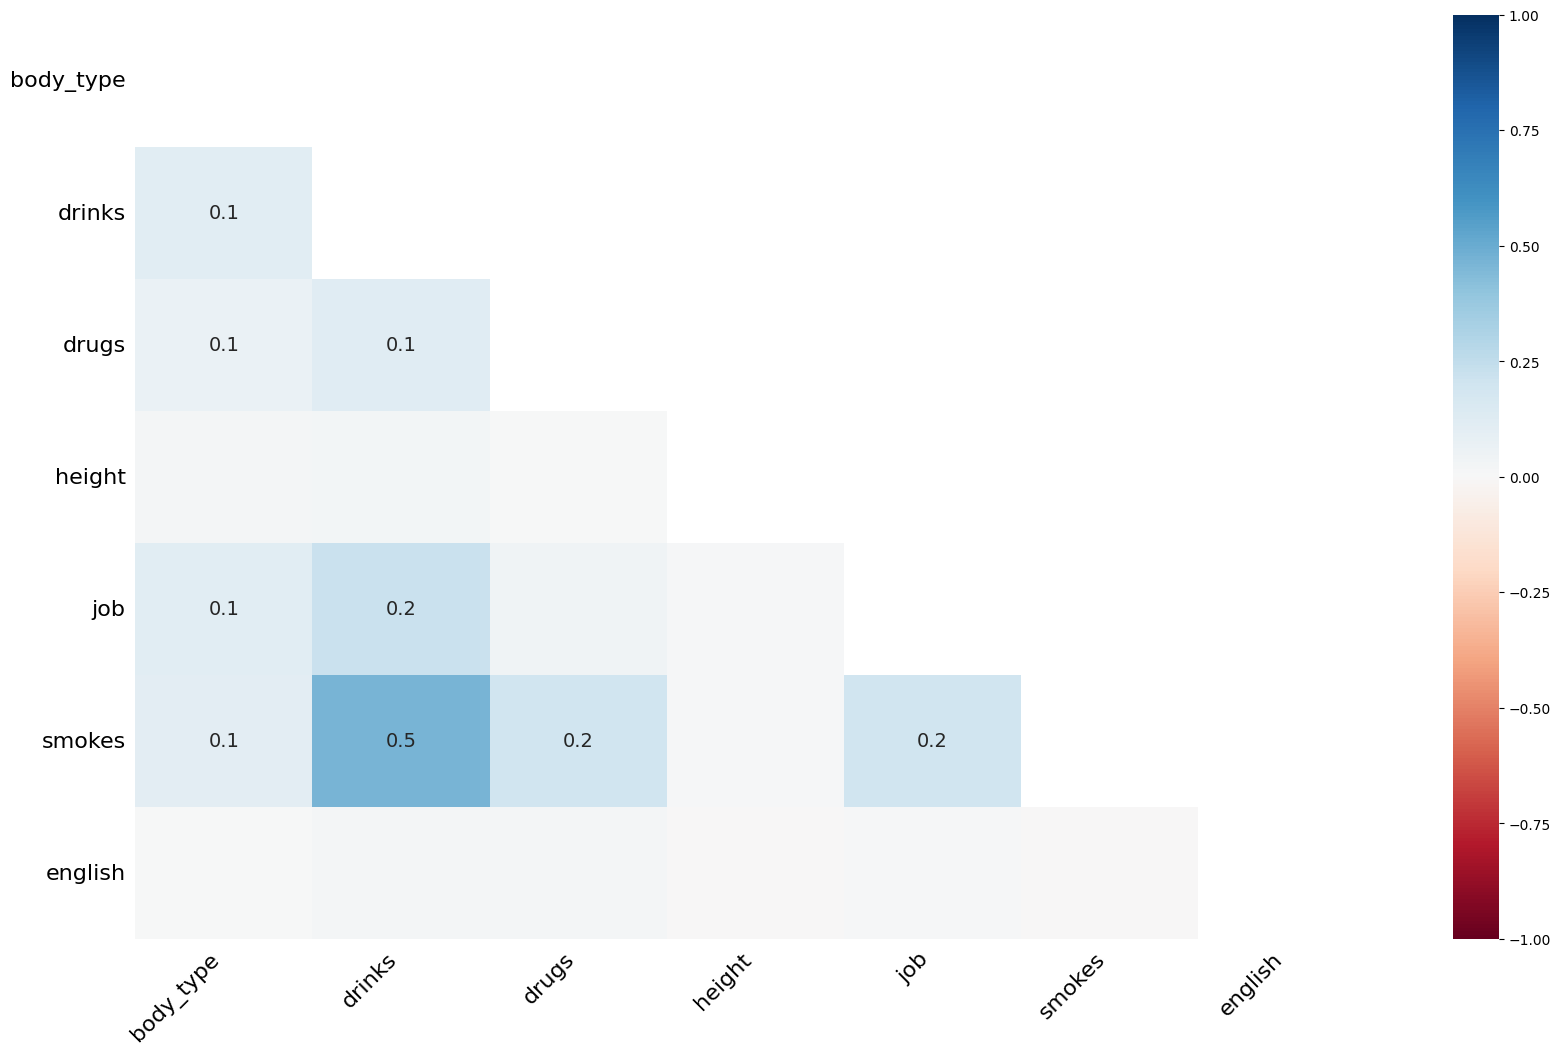

In [44]:
#MCAR Test
import missingno as msno

msno.heatmap(working, )

In [45]:
#Remobing High Null Rows
print("DataFrame shape prior to removal: ", df.shape)
df['null_count'] = df.isna().sum(axis = 1)
df = df[df['null_count'] < (0.4 * df.shape[1])]
df.drop(columns = ['null_count'], inplace = True)
print("DataFrame shape post removal: ", df.shape)
working = create_working(df)

DataFrame shape prior to removal:  (52357, 11)
DataFrame shape post removal:  (52209, 11)


In [46]:
#Drinks and Smokes are definetly not missing at random
w = df['drinks'].isna() & df['smokes'].isna()
df.loc[w, ['drinks', 'smokes']] = 'Rather not say'
working = create_working(df)

In [47]:
df.dropna(subset = ['english'], inplace = True)

### Encoding

In [51]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols = cat_cols.drop("which_set")

In [52]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown =  'ignore', sparse_output = False)

cat_hot = cat_encoder.fit_transform(df[cat_cols])

cat_names = cat_encoder.get_feature_names_out(cat_cols)

one_df = pd.DataFrame(
    cat_hot,
    columns = cat_names,
    index = df.index
)

df = pd.concat(
    [df.drop(columns = cat_cols), one_df],
    axis = 1
)

### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'height']] = scaler.fit_transform(df[['age', 'height']])

In [57]:
working.columns

Index(['age', 'height', 'which_set', 'body_type_a little extra',
       'body_type_athletic', 'body_type_average', 'body_type_curvy',
       'body_type_fit', 'body_type_full figured', 'body_type_jacked',
       'body_type_overweight', 'body_type_rather not say', 'body_type_skinny',
       'body_type_thin', 'body_type_used up', 'body_type_nan',
       'drinks_Rather not say', 'drinks_desperately', 'drinks_not at all',
       'drinks_often', 'drinks_rarely', 'drinks_socially', 'drinks_very often',
       'drinks_nan', 'drugs_never', 'drugs_often', 'drugs_sometimes',
       'drugs_nan', 'job_artistic / musical / writer',
       'job_banking / financial / real estate',
       'job_clerical / administrative', 'job_computer / hardware / software',
       'job_construction / craftsmanship', 'job_education / academia',
       'job_entertainment / media', 'job_executive / management',
       'job_hospitality / travel', 'job_law / legal services',
       'job_medicine / health', 'job_military', 

### Train Test Splitting

In [ ]:
working = create_working(df)
holding = create_holding(df)

# Binary Classifier

In [ ]:
working_y = working['job_medicine / health'].copy()
working_X = working.drop(columns = ['job_medicine / health']).copy()

AttributeError: 'DataFrame' object has no attribute 'job'

In [ ]:
y

# Fine Tuning

# Project Review